# Домашнее задание по третьей лекции второго модуля.


## 1. Построение графа Де Брюина

По заданному набору ридов в формате FASTQ и параметру k, который соответствует длине k-меров, построить граф Де Брюина, некоторый путь в котором соответствовал бы возможной подстроке в исходном геноме. Не забывайте про запоминание покрытия каждого k-мера, а так же про сами подстроки, которые соответствуют каждому ребру. В остальном граф полностью соответствует тому, что был описан в лекции.

In [46]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqIO import QualityIO
import random

import matplotlib.pyplot as plt

### Подготовка тестовых данных

In [3]:
# Подготовка тестовых данных:
print("Данные для тестирования:")
"""Для того чтобы тестировать Ваш код, используйте синтетические данные без ошибок. 
Можете просто сгенерировать большую случайную строку длины 1000 и из нее набрать подстроки длины 150. 
Считайте при записи в FASTQ, что качество таких ридов наилучшее.
"""
print('* Данные сгенерированной строки 1000 символов')
ln, ln_sub = 1000, 150
seq_FASTQ = ''.join(random.choice('ACGT') for _ in range(ln))
print('Исходная строка: ', seq_FASTQ)
print()

records = []
for i in range(0, ln, ln_sub):
    seqt = seq_FASTQ[i:i + ln_sub]    
    len_la = len(seqt)
    t = SeqRecord(Seq(seqt), id = f'Seq_id_{i}')        
    t.letter_annotations["phred_quality"]=[93]*len_la    
    print(t.format("fastq"))
    records.append(t)

with open("data.fastq", "w") as handle:
  SeqIO.write(records, handle, "fastq")


Данные для тестирования:
* Данные сгенерированной строки 1000 символов
Исходная строка:  CATGGCAGCCGGCGCACTAAAGAATTTCAAAGATATCACGTTATAAGCGTGACTGGACGGCGTCGAACGATAGGCCGGCCCTAAGCGACTGATTCCAGGGTTCTGATACAGTTTCGATAACACTGGTAAGCCACCCGTCCTGTTGTCCGCGTTTGAATTTGGAGTCTTCATTATTCTACGTGACGTCGACCCTCGCGGAACCGGGGTCAATTCTAGTAATGCACAGAGGGGCAGCAGGCTTCGTGTGAACTTCCCATTTCGTTTAGGAGGTCTGATCGGCTGGTCTGGTCAGTTCAACATACCGACAATGTATTCTGAGATTGCCCAATGAAACCAGCTAGAATAAAATGCCACGGAAGGATCGAGCGTTTACACGCAAACGTCCAGACTAGTCGGTACCAGCACGCTGGCGGGGGATTGTACTAATCACACGTTGGATACATGGTGCTGGCCTATTGGGACGCTAGATGAGTAACGCCAGGTACGTTCCTTATTCTTGACAATAAGGAAACATGAAGCAAAATCAAGTTAACATGCAGGGAAAAAGACTGATGCCCTTTTTACCGGATAAAACGCCTTTACTGCGTCGGCGAAGAAATGAAACACCGCTCGCGTTAAGCATGGTATCTACCTGACCCGTGGAATGTTACGATGATACATTTCTACCGATAATAGAGTCGCGGGTCGACGTGCTCCCAGTTGGGGGCCCTGGGCACTTACGTGAAGGTATAGGTCTCGCAATTCTATATAGGCTGTCGCTGCGTCGCGTGAAGAGAAATTCATAGCATAAAGGGTGGCTGTACCATTCGCATCCATGATGAGACATGCAGTATCTGCAGATGTTTACACCGACGTGCGCCCACCAATAAAATGGTCATAGGTCAATCTGAGCCCTATTTTTTTGAATAAAA

In [41]:
print('* Данные из презентаций:')

print()
seq_0 = 'ACGTCCGTAA'
print(f' + seq_0: {seq_0}' )
t = SeqRecord(Seq(seq_0), id = f'Seq_id_{i}')        
t.letter_annotations["phred_quality"]=[93]*len(seq_0)
print(t.format("fastq"))
nd_0 = [t]
with open("nd_0.fastq", "w") as handle:
  SeqIO.write(nd_0, handle, "fastq")

print()
seq_1 = 'CCGTTGCAGG'
print(f' + seq_1: {seq_1}' )
lst = ['CCGTTG', 'TGCAGG', 'GTTGCA']
nd_1 = []
for seqt in lst:
    t = SeqRecord(Seq(seqt), id = f'Seq_id_{seqt}')        
    t.letter_annotations["phred_quality"]=[93]*len(seqt)
    print(t.format("fastq"))
    nd_1.append(t)
with open("nd_1.fastq", "w") as handle:
  SeqIO.write(nd_1, handle, "fastq")    

print()
seq_2 = 'AGCTTTTCATTCTGACTGCAACGGGCAATA'
print(f' + seq_2: {seq_2}' )
lst = ['TTTCATTC', 'AACGGGCA', 'AGCTTTTC', 'CTGCAACG', 'GGGCAATA', 'TGACTGCA', 'CATTCTGA']
nd_2 = []
for seqt in lst:
    t = SeqRecord(Seq(seqt), id = f'Seq_id_{seqt}')        
    t.letter_annotations["phred_quality"]=[93]*len(seqt)
    print(t.format("fastq"))
    nd_2.append(t)
with open("nd_2.fastq", "w") as handle:
  SeqIO.write(nd_2, handle, "fastq")  

print()
seq_tip_1 = 'CCGTTGCAGG'
print(f' + seq_tip_1: {seq_tip_1}' )
lst = ['CCGTTG', 'CGTTAC', 'GTTGCA', 'TGCAGG']
nd_tip_1 = []
for seqt in lst:
    t = SeqRecord(Seq(seqt), id = f'Seq_id_{seqt}')        
    t.letter_annotations["phred_quality"]=[93]*len(seqt)
    print(t.format("fastq"))
    nd_tip_1.append(t)
with open("nd_tip_1.fastq", "w") as handle:
  SeqIO.write(nd_tip_1, handle, "fastq")

print()
seq_bug_1 = 'CCGTTGCAGG'
print(f' + seq_bug_1: {seq_bug_1}' )
lst = ['CCGTTG', 'CGTTACAG', 'GTTGCA', 'TGCAGG']
nd_bug_1 = []
for seqt in lst:
    t = SeqRecord(Seq(seqt), id = f'Seq_id_{seqt}')        
    t.letter_annotations["phred_quality"]=[93]*len(seqt)
    print(t.format("fastq"))
    nd_bug_1.append(t)
with open("nd_bug_1.fastq", "w") as handle:
  SeqIO.write(nd_bug_1, handle, "fastq")

print('* Мои данные:')
print()
seq_3 = 'ACGTCCGTAA'
print(f' + seq_3: {seq_3}' )
lst = ['ACGTCCG', 'CGTCCGT', 'TCCGTAA']
nd_3 = []
for seqt in lst:
    t = SeqRecord(Seq(seqt), id = f'Seq_id_{seqt}')        
    t.letter_annotations["phred_quality"]=[93]*len(seqt)
    print(t.format("fastq"))
    nd_3.append(t)
with open("nd_3.fastq", "w") as handle:
  SeqIO.write(nd_3, handle, "fastq")

* Данные из презентаций:

 + seq_0: ACGTCCGTAA
@Seq_id_GTA <unknown description>
ACGTCCGTAA
+
~~~~~~~~~~


 + seq_1: CCGTTGCAGG
@Seq_id_CCGTTG <unknown description>
CCGTTG
+
~~~~~~

@Seq_id_TGCAGG <unknown description>
TGCAGG
+
~~~~~~

@Seq_id_GTTGCA <unknown description>
GTTGCA
+
~~~~~~


 + seq_2: AGCTTTTCATTCTGACTGCAACGGGCAATA
@Seq_id_TTTCATTC <unknown description>
TTTCATTC
+
~~~~~~~~

@Seq_id_AACGGGCA <unknown description>
AACGGGCA
+
~~~~~~~~

@Seq_id_AGCTTTTC <unknown description>
AGCTTTTC
+
~~~~~~~~

@Seq_id_CTGCAACG <unknown description>
CTGCAACG
+
~~~~~~~~

@Seq_id_GGGCAATA <unknown description>
GGGCAATA
+
~~~~~~~~

@Seq_id_TGACTGCA <unknown description>
TGACTGCA
+
~~~~~~~~

@Seq_id_CATTCTGA <unknown description>
CATTCTGA
+
~~~~~~~~


 + seq_tip_1: CCGTTGCAGG
@Seq_id_CCGTTG <unknown description>
CCGTTG
+
~~~~~~

@Seq_id_CGTTAC <unknown description>
CGTTAC
+
~~~~~~

@Seq_id_GTTGCA <unknown description>
GTTGCA
+
~~~~~~

@Seq_id_TGCAGG <unknown description>
TGCAGG
+
~~~~~~


 + se

### Реализация

In [91]:
def de_bruijn_graph(nd, k):
    v, e = {}, {}
    n = 0
    for read in nd: 
        seq = read.seq
        if len(seq)<k: 
            raise ValueError("Длина рида не может быть меньше длины k-меров")
        v1 = seq[:k]
        if v1 not in v:
            v[v1] = [0, 0, []] # кол-во входов, кол-во выходов, выходящие ребра
        for i in range(1, len(seq)-k+1):
            e0 = seq[i-1:i+k] 
            if e0 in e: 
                e[e0][0] += 1 # покрытие
                v1 = e0[1:]
                continue
            v2 = e0[1:]                        
            if v2 in v:
                v[v2][0] += 1
            else:
                v[v2] = [1, 0, []]                
            v[v1][1] += 1
            v[v1][2].append(e0)
            e[e0] = [1] # покрытие; целевая вершина соответствует последним к символам ребра
            v1 = v2
        n +=1
    return v, e

### Тестирование

In [92]:
tests = [('nd_0', 2), ('nd_1', 3), ('nd_2', 3), ('nd_2', 4), ('nd_3', 2)]
for nd_name, k in tests:
    print(f'nd = {nd_name}, k = {k}:')
    nd = SeqIO.parse(f"{nd_name}.fastq", "fastq")
    v, e = de_bruijn_graph(nd, k)
    for i, val in v.items():
        print(i, val)
    print()    
    for i, val in e.items():
        print(i, val)
    print()

nd = nd_0, k = 2:
AC [0, 1, [Seq('ACG')]]
CG [2, 1, [Seq('CGT')]]
GT [1, 2, [Seq('GTC'), Seq('GTA')]]
TC [1, 1, [Seq('TCC')]]
CC [1, 1, [Seq('CCG')]]
TA [1, 1, [Seq('TAA')]]
AA [1, 0, []]

ACG [1]
CGT [2]
GTC [1]
TCC [1]
CCG [1]
GTA [1]
TAA [1]

nd = nd_1, k = 3:
CCG [0, 1, [Seq('CCGT')]]
CGT [1, 1, [Seq('CGTT')]]
GTT [1, 1, [Seq('GTTG')]]
TTG [1, 1, [Seq('TTGC')]]
TGC [1, 1, [Seq('TGCA')]]
GCA [1, 1, [Seq('GCAG')]]
CAG [1, 1, [Seq('CAGG')]]
AGG [1, 0, []]

CCGT [1]
CGTT [1]
GTTG [2]
TGCA [2]
GCAG [1]
CAGG [1]
TTGC [1]

nd = nd_2, k = 3:
TTT [2, 2, [Seq('TTTC'), Seq('TTTT')]]
TTC [2, 2, [Seq('TTCA'), Seq('TTCT')]]
TCA [1, 1, [Seq('TCAT')]]
CAT [1, 1, [Seq('CATT')]]
ATT [1, 1, [Seq('ATTC')]]
AAC [1, 1, [Seq('AACG')]]
ACG [1, 1, [Seq('ACGG')]]
CGG [1, 1, [Seq('CGGG')]]
GGG [1, 1, [Seq('GGGC')]]
GGC [1, 1, [Seq('GGCA')]]
GCA [2, 1, [Seq('GCAA')]]
AGC [0, 1, [Seq('AGCT')]]
GCT [1, 1, [Seq('GCTT')]]
CTT [1, 1, [Seq('CTTT')]]
CTG [2, 2, [Seq('CTGC'), Seq('CTGA')]]
TGC [1, 1, [Seq('TGCA')]]
C

## 2. Сжатие графа

Научитесь производить сжатие графа Де Брюина. При сжатии не забывайте склеивать подстроки на ребрах и обновлять покрытие ребер. Пересчитывайте покрытие склеиваемых ребер как взвешенное среднее, где вес соответствует длине подстроки, соответствующей ребру.

### Реализация

In [10]:
class Edge:
    def __init__(self, idx):#, v_in, v_out):
        self.label = idx
        self.id = idx
        self.cover = 1
        self.v_in = None
        self.v_out = None

    def __str__(self):
        return f"'{self.label}' из '{self.v_in.label}' в '{self.v_out.label}' с покрытием {self.cover}"

class Node:    
    def __init__(self, lab, k, in_cnt = 0, out_cnt = 0, first_in = None):
        self.label = lab
        self.k = k
        self.in_cnt = in_cnt
        self.out_cnt = out_cnt
        self.out_edges = []
        self.first_in = first_in

    def __str__(self):
        out_edges = [i.label for i in self.out_edges]
        return f"'{self.label}': входов {self.in_cnt}, выходов {self.out_cnt}, исходящие ребра: {out_edges}" #, {self.first_in}" # из '{self.v_in}' в '{self.v_out}' с покрытием {self.cover}"

    def condens (self):
        e_next = self.out_edges[0]        
        ln_out  = len(e_next.label)
        ln_in = len(self.first_in.label)
        cov = e_next.cover * ln_out + self.first_in.cover*ln_in
        #print('cov: ', self.first_in.cover, ln_in, e_next.cover,  ln_out)
        self.first_in.label +=  e_next.label[self.k:]        
        self.first_in.cover = cov/ (ln_out+ln_in)
        #print(cov, (ln_out+ln_in), self.first_in.cover, self.first_in.label)
        e_next.v_out.first_in = self.first_in
        self.first_in.v_out=e_next.v_out
        
        
def de_bruijn_graph(nd, k, Condensed = True):
    '''
    Condensed = Сжатие графа
    '''
    v, e = {}, {}
    for read in nd: 
        seq = str(read.seq)
        if len(seq)<k: 
            raise ValueError("Длина рида не может быть меньше длины k-меров")
        v1 = seq[:k]
        if v1 not in v:
            v[v1] = Node(v1, k) # кол-во входов, кол-во выходов, выходящие ребра, первое входящее ребро
        for i in range(1, len(seq)-k+1):
            e0 = seq[i-1:i+k] 
            if e0 in e:
                e[e0].cover += 1
                v1 = e0[1:]
                continue
            v2 = e0[1:] 
            e[e0] = Edge(e0)
            if v2 in v:
                v[v2].in_cnt += 1
                v[v2].first_in = e[e0]
            else:
                v[v2] = Node(v2, k, 1, 0, e[e0])    
            
            v[v1].out_cnt += 1
            v[v1].out_edges.append(e[e0])
            e[e0].v_in =v[v1]  # кол-во повторений, целевая вершина повторяет последние к символов ребра
            e[e0].v_out =v[v2]
            v1 = v2
    
    if Condensed:
        v_lst = list(v.keys())                
        for i in v_lst:            
            if i not in v: continue
            if not (v[i].in_cnt == v[i].out_cnt == 1): continue
            #print ('del: ', v[i].label)            
            v[i].condens()
            del e[v[i].out_edges[0].id]               
            del v[i]
            
                   
    return v, e

### Тестирование

In [11]:
tests = [('nd_0', 2), ('nd_1', 3), ('nd_2', 3), ('nd_2', 4), ('nd_3', 2)]
for nd_name, k in tests:
    print(f'nd = {nd_name}, k = {k}:')
    nd = SeqIO.parse(f"{nd_name}.fastq", "fastq")
    v, e = de_bruijn_graph(nd, k)
    print(' + Вершины:')
    for i, val in v.items():
        print(val)
    print(' + Ребра')
    for i, val in e.items():
        print(val)
    print()

nd = nd_0, k = 2:
 + Вершины:
'AC': входов 0, выходов 1, исходящие ребра: ['ACG']
'CG': входов 2, выходов 1, исходящие ребра: ['CGT']
'GT': входов 1, выходов 2, исходящие ребра: ['GTCCG', 'GTAA']
'AA': входов 1, выходов 0, исходящие ребра: []
 + Ребра
'ACG' из 'AC' в 'CG' с покрытием 1
'CGT' из 'CG' в 'GT' с покрытием 2
'GTCCG' из 'GT' в 'CG' с покрытием 1.0
'GTAA' из 'GT' в 'AA' с покрытием 1.0

nd = nd_1, k = 3:
 + Вершины:
'CCG': входов 0, выходов 1, исходящие ребра: ['CCGTTGCAGG']
'AGG': входов 1, выходов 0, исходящие ребра: []
 + Ребра
'CCGTTGCAGG' из 'CCG' в 'AGG' с покрытием 1.2461538461538462

nd = nd_2, k = 3:
 + Вершины:
'TTT': входов 2, выходов 2, исходящие ребра: ['TTTC', 'TTTT']
'TTC': входов 2, выходов 2, исходящие ребра: ['TTCATTC', 'TTCTG']
'GCA': входов 2, выходов 1, исходящие ребра: ['GCAA']
'AGC': входов 0, выходов 1, исходящие ребра: ['AGCTTT']
'CTG': входов 2, выходов 2, исходящие ребра: ['CTGCA', 'CTGACTG']
'CAA': входов 1, выходов 2, исходящие ребра: ['CAACGGGCA'

## 3. Удаление хвостов

Научитесь удалять такие хвосты в графе, длина которых меньше либо равна 2k. Таким образом должно получится удаление последствий единичных ошибок в ридах.

### Реализация


In [39]:
class Edge:
    def __init__(self, idx):#, v_in, v_out):
        self.label = idx
        self.id = idx
        self.cover = 1
        self.v_in = None
        self.v_out = None

    def __str__(self):
        return f"'{self.label}' из '{self.v_in.label}' в '{self.v_out.label}' с покрытием {self.cover}"

class Node:    
    def __init__(self, lab, k, in_cnt = 0, out_cnt = 0, first_in = None):
        self.label = lab
        self.k = k
        self.in_cnt = in_cnt
        self.out_cnt = out_cnt
        self.out_edges = []
        self.first_in = first_in

    def __str__(self):
        out_edges = [i.label for i in self.out_edges]
        return f"'{self.label}': входов {self.in_cnt}, выходов {self.out_cnt}, исходящие ребра: {out_edges}"

    def condens (self):
        e_next = self.out_edges[0]        
        ln_out  = len(e_next.label)
        ln_in = len(self.first_in.label)
        cov = e_next.cover * ln_out + self.first_in.cover*ln_in
        #print('cov: ', self.first_in.cover, ln_in, e_next.cover,  ln_out)
        self.first_in.label +=  e_next.label[self.k:]        
        self.first_in.cover = cov/ (ln_out+ln_in)
        #print(cov, (ln_out+ln_in), self.first_in.cover, self.first_in.label)
        e_next.v_out.first_in = self.first_in
        self.first_in.v_out=e_next.v_out
        
        
def de_bruijn_graph(nd, k, condensed = True, clipping = True):
    '''
    condensed = Сжатие графа
    clipping = Удаление хвостов
    '''
    v, e = {}, {}    
    for read in nd: 
        seq = str(read.seq)        
        if len(seq)<k: 
            raise ValueError("Длина рида не может быть меньше длины k-меров")
        v1 = seq[:k]
        if v1 not in v:
            v[v1] = Node(v1, k) # кол-во входов, кол-во выходов, выходящие ребра, первое входящее ребро
        for i in range(1, len(seq)-k+1):
            e0 = seq[i-1:i+k] 
            if e0 in e:
                e[e0].cover += 1
                v1 = e0[1:]
                continue
            v2 = e0[1:] 
            e[e0] = Edge(e0)
            if v2 in v:
                v[v2].in_cnt += 1
                v[v2].first_in = e[e0]
            else:
                v[v2] = Node(v2, k, 1, 0, e[e0])    
            
            v[v1].out_cnt += 1
            v[v1].out_edges.append(e[e0])
            e[e0].v_in =v[v1]  # кол-во повторений, целевая вершина повторяет последние к символов ребра
            e[e0].v_out =v[v2]
            v1 = v2
    
    if condensed:
        v_lst = list(v.keys())                
        for i in v_lst:            
            if i not in v: continue
            if not (v[i].in_cnt == v[i].out_cnt == 1): continue
            #print ('del: ', v[i].label)            
            v[i].condens()
            del e[v[i].out_edges[0].id]               
            del v[i]

    if clipping:
        """
        Критерии хвоста для удаления:
        - Висячая вершина
        - Длина ребра меньше 2k
        - Низкое покрытие ребра
        
        1. Формирую список хвостов
        2. Нахожу границу низкого покрытия
        3. Удаляю хвосты, подходящие под критерии.
           Если такие есть, перехожу к пункту 2
        4. Удаляю висящие вершины
        """
        def boundary():
            s = sum(i for _, _,  _, i in tips)
            return s*0.3

        def get_tips():
            # Формирую список хвостов
            tips = [] # указатель на вершину: признак ребра, флаг соответствия по длине, значение распределения 
            #можно добавить проверку на повторы
            for i in v:            
                if v[i].in_cnt == 0 and v[i].out_cnt == 1:
                    e_sm = v[i].out_edges[0]
                    pr = 0
                elif v[i].out_cnt == 0:
                    e_sm = v[i].first_in
                    pr = 1
                else: continue
                l = len(e_sm.label)
                fl = True if l<= k2 else False
                p = l*e_sm.cover            
                tips.append((i, pr,  fl, p))
            tips.sort(key = lambda x: (x[2], -x[3]))
            return tips
        
        t = True
        k2 = 2*k
        tips = get_tips()        
        s = boundary()
               
        while len(tips)>0 and tips[-1][2] and tips[-1][3]<= s:
            while len(tips)>0 and tips[-1][2] and tips[-1][3]<= s:
                i, pr, _, _ = tips.pop()                
                if pr:
                    v[i].first_in.v_out = None
                    for z, j in enumerate(v[i].first_in.v_in.out_edges):
                        if j == v[i].first_in:
                            del v[i].first_in.v_in.out_edges[z]
                            v[i].first_in.v_in.out_cnt -= 1
                            del e[v[i].first_in.id]   
                            break
                else:
                    v[i].out_edges[0].v_out = None
                    v[i].out_edges[0].v_out.first_in =None
                    v[i].first_in.v_out.in_cnt -= 1
                    del v[i].out_edges[0]
                    del e[v[i].out_edges[0].id]   
                del v[i]

            tips = get_tips()        
            s = boundary()

        v_lst = list(v.keys())                
        for i in v_lst:      
            if v[i].in_cnt == 0 and v[i].out_cnt == 0:
                del v[i]        
            
                   
    return v, e

### Тестирование

In [40]:
tests = [('nd_tip_1', 3), ('nd_0', 2), ('nd_1', 3), ('nd_2', 3), ('nd_2', 4), ('nd_3', 2)]
for nd_name, k in tests:
    print(f'nd = {nd_name}, k = {k}:')
    nd = SeqIO.parse(f"{nd_name}.fastq", "fastq")
    v, e = de_bruijn_graph(nd, k)
    print(' + Вершины:')
    for i, val in v.items():
        print(val)
    print(' + Ребра')
    for i, val in e.items():
        print(val)
    print()


nd = nd_tip_1, k = 3:
 + Вершины:
'CCG': входов 0, выходов 1, исходящие ребра: ['CCGTT']
'GTT': входов 1, выходов 1, исходящие ребра: ['GTTGCAGG']
'AGG': входов 1, выходов 0, исходящие ребра: []
 + Ребра
'CCGTT' из 'CCG' в 'GTT' с покрытием 1.5
'GTTGCAGG' из 'GTT' в 'AGG' с покрытием 1.2757575757575756

nd = nd_0, k = 2:
 + Вершины:
'AC': входов 0, выходов 1, исходящие ребра: ['ACG']
'CG': входов 2, выходов 1, исходящие ребра: ['CGT']
'GT': входов 1, выходов 2, исходящие ребра: ['GTCCG', 'GTAA']
'AA': входов 1, выходов 0, исходящие ребра: []
 + Ребра
'ACG' из 'AC' в 'CG' с покрытием 1
'CGT' из 'CG' в 'GT' с покрытием 2
'GTCCG' из 'GT' в 'CG' с покрытием 1.0
'GTAA' из 'GT' в 'AA' с покрытием 1.0

nd = nd_1, k = 3:
 + Вершины:
'CCG': входов 0, выходов 1, исходящие ребра: ['CCGTTGCAGG']
'AGG': входов 1, выходов 0, исходящие ребра: []
 + Ребра
'CCGTTGCAGG' из 'CCG' в 'AGG' с покрытием 1.2461538461538462

nd = nd_2, k = 3:
 + Вершины:
'TTT': входов 2, выходов 2, исходящие ребра: ['TTTC', 'T

<div style="background-color: #ffedd5;">
<h2> 4. Удаление пузырей</h2>

Реализуйте возможность после построения графа удалять плохо покрытые хвосты. Чтобы определить, является ли хвост плохо покрытым, нужно посчитать распределение произведений покрытий на длину хвоста по всем хвостам и удалить те, что попадают в 30 процентов ближе к нулю распределения.

<font color='red'><b>Не реализовано</b></font> </div>

### Реализация

In [43]:
class Edge:
    def __init__(self, idx):#, v_in, v_out):
        self.label = idx
        self.id = idx
        self.cover = 1
        self.v_in = None
        self.v_out = None

    def __str__(self):
        return f"'{self.label}' из '{self.v_in.label}' в '{self.v_out.label}' с покрытием {self.cover}"

class Node:    
    def __init__(self, lab, k, in_cnt = 0, out_cnt = 0, first_in = None):
        self.label = lab
        self.k = k
        self.in_cnt = in_cnt
        self.out_cnt = out_cnt
        self.out_edges = []
        self.first_in = first_in

    def __str__(self):
        out_edges = [i.label for i in self.out_edges]
        return f"'{self.label}': входов {self.in_cnt}, выходов {self.out_cnt}, исходящие ребра: {out_edges}"

    def condens (self):
        e_next = self.out_edges[0]        
        ln_out  = len(e_next.label)
        ln_in = len(self.first_in.label)
        cov = e_next.cover * ln_out + self.first_in.cover*ln_in
        self.first_in.label +=  e_next.label[self.k:]        
        self.first_in.cover = cov/ (ln_out+ln_in)
        e_next.v_out.first_in = self.first_in
        self.first_in.v_out=e_next.v_out
        
        
def de_bruijn_graph(nd, k, condensed = True, clipping = True, popping = True):
    '''
    condensed = Сжатие графа
    clipping = Удаление хвостов
    popping = Удаление пузырей
    '''
    v, e = {}, {}    
    for read in nd: 
        seq = str(read.seq)        
        if len(seq)<k: 
            raise ValueError("Длина рида не может быть меньше длины k-меров")
        v1 = seq[:k]
        if v1 not in v:
            v[v1] = Node(v1, k) # кол-во входов, кол-во выходов, выходящие ребра, первое входящее ребро
        for i in range(1, len(seq)-k+1):
            e0 = seq[i-1:i+k] 
            if e0 in e:
                e[e0].cover += 1
                v1 = e0[1:]
                continue
            v2 = e0[1:] 
            e[e0] = Edge(e0)
            if v2 in v:
                v[v2].in_cnt += 1
                v[v2].first_in = e[e0]
            else:
                v[v2] = Node(v2, k, 1, 0, e[e0])    
            
            v[v1].out_cnt += 1
            v[v1].out_edges.append(e[e0])
            e[e0].v_in =v[v1]  # кол-во повторений, целевая вершина повторяет последние к символов ребра
            e[e0].v_out =v[v2]
            v1 = v2
    
    if condensed:
        v_lst = list(v.keys())                
        for i in v_lst:            
            if i not in v: continue
            if not (v[i].in_cnt == v[i].out_cnt == 1): continue
            #print ('del: ', v[i].label)            
            v[i].condens()
            del e[v[i].out_edges[0].id]               
            del v[i]

    if clipping:
        """
        Критерии хвоста для удаления:
        - Висячая вершина
        - Длина ребра меньше 2k
        - Низкое покрытие ребра
        
        1. Формирую список хвостов
        2. Нахожу границу низкого покрытия
        3. Удаляю хвосты, подходящие под критерии.
           Если такие есть, перехожу к пункту 2
        4. Удаляю висящие вершины
        """
        def boundary():
            s = sum(i for _, _,  _, i in tips)
            return s*0.3

        def get_tips():
            # Формирую список хвостов
            tips = [] # указатель на вершину: признак ребра, флаг соответствия по длине, значение распределения 
            for i in v:            
                if v[i].in_cnt == 0 and v[i].out_cnt == 1:
                    e_sm = v[i].out_edges[0]
                    pr = 0
                elif v[i].out_cnt == 0:
                    e_sm = v[i].first_in
                    pr = 1
                else: continue
                l = len(e_sm.label)
                fl = True if l<= k2 else False
                p = l*e_sm.cover            
                tips.append((i, pr,  fl, p))
            tips.sort(key = lambda x: (x[2], -x[3]))
            return tips
        
        t = True
        k2 = 2*k
        tips = get_tips()        
        s = boundary()
               
        while len(tips)>0 and tips[-1][2] and tips[-1][3]<= s:
            while len(tips)>0 and tips[-1][2] and tips[-1][3]<= s:
                i, pr, _, _ = tips.pop()                
                if pr:
                    v[i].first_in.v_out = None
                    for z, j in enumerate(v[i].first_in.v_in.out_edges):
                        if j == v[i].first_in:
                            del v[i].first_in.v_in.out_edges[z]
                            v[i].first_in.v_in.out_cnt -= 1
                            del e[v[i].first_in.id]   
                            break
                else:
                    v[i].out_edges[0].v_out = None
                    v[i].out_edges[0].v_out.first_in =None
                    v[i].first_in.v_out.in_cnt -= 1
                    del v[i].out_edges[0]
                    del e[v[i].out_edges[0].id]   
                del v[i]

            tips = get_tips()        
            s = boundary()

        v_lst = list(v.keys())                
        for i in v_lst:      
            if v[i].in_cnt == 0 and v[i].out_cnt == 0:
                del v[i]     

    if popping:
        pass
        
            
                   
    return v, e

### Тестирование

In [42]:
tests = [('nd_bug_1', 3)]#, ('nd_tip_1', 3), ('nd_0', 2), ('nd_1', 3), ('nd_2', 3), ('nd_2', 4), ('nd_3', 2)]
for nd_name, k in tests:
    print(f'nd = {nd_name}, k = {k}:')
    nd = SeqIO.parse(f"{nd_name}.fastq", "fastq")
    v, e = de_bruijn_graph(nd, k)
    print(' + Вершины:')
    for i, val in v.items():
        print(val)
    print(' + Ребра')
    for i, val in e.items():
        print(val)
    print()

nd = nd_bug_1, k = 3:
 + Вершины:
'CCG': входов 0, выходов 1, исходящие ребра: ['CCGTT']
'GTT': входов 1, выходов 2, исходящие ребра: ['GTTGCAG', 'GTTACAG']
'CAG': входов 2, выходов 1, исходящие ребра: ['CAGG']
'AGG': входов 1, выходов 0, исходящие ребра: []
 + Ребра
'CCGTT' из 'CCG' в 'GTT' с покрытием 1.5
'GTTGCAG' из 'GTT' в 'CAG' с покрытием 1.4333333333333333
'GTTACAG' из 'GTT' в 'CAG' с покрытием 1.0
'CAGG' из 'CAG' в 'AGG' с покрытием 1

nd = nd_tip_1, k = 3:
 + Вершины:
'CCG': входов 0, выходов 1, исходящие ребра: ['CCGTT']
'GTT': входов 1, выходов 1, исходящие ребра: ['GTTGCAGG']
'AGG': входов 1, выходов 0, исходящие ребра: []
 + Ребра
'CCGTT' из 'CCG' в 'GTT' с покрытием 1.5
'GTTGCAGG' из 'GTT' в 'AGG' с покрытием 1.2757575757575756

nd = nd_0, k = 2:
 + Вершины:
'AC': входов 0, выходов 1, исходящие ребра: ['ACG']
'CG': входов 2, выходов 1, исходящие ребра: ['CGT']
'GT': входов 1, выходов 2, исходящие ребра: ['GTCCG', 'GTAA']
'AA': входов 1, выходов 0, исходящие ребра: []
 + 

## 5. Анализ графа после упрощений

Постройте граф на основе ридов представленных по ссылке ниже. Сохраните граф до всех упрощений и после, посчитайте распределения степеней вершин и покрытий ребер, постройте графики. Так же сравните на сколько уменьшается количество вершин и ребер.

In [73]:
tests = [('nd_tip_1', 3), ('nd_0', 2), ('nd_1', 3), ('nd_2', 3), ('nd_2', 4), ('nd_3', 2)]
s = []
for nd_name, k in tests:
    ne, nv, ne2 = {}, {}, {}
    ke, kv = 0, 0
    print(f'nd = {nd_name}, k = {k}:')
    nd = SeqIO.parse(f"{nd_name}.fastq", "fastq")
    v, e = de_bruijn_graph(nd, k)
    
    print(' + Вершины:')
    for i, val in v.items():
        n = val.in_cnt+ val.out_cnt
        kv += 1
        nv[n] = nv.get(n, 0) +1
        print(val)
    print(f'Распределение ({kv}): ', nv)
    
    print(' + Ребра')
    for i, val in e.items():
        ke += 1
        n = len(val.label)
        #if val.cover in ne:
        #    ne[val.cover][n] = ne[val.cover].get(n, 0) +1
        #else:
        #    ne[val.cover] = {n: 1}
        ne[val.cover] = ne.get(val.cover, 0) +n
        ne2[val.cover] = ne2.get(val.cover, 0) +1
        print(val)
    print(f'Распределение ({ke}): ', ne, ne2)
    print()

nd = nd_tip_1, k = 3:
 + Вершины:
'CCG': входов 0, выходов 1, исходящие ребра: ['CCGTT']
'GTT': входов 1, выходов 1, исходящие ребра: ['GTTGCAGG']
'AGG': входов 1, выходов 0, исходящие ребра: []
Распределение (3):  {1: 2, 2: 1}
 + Ребра
'CCGTT' из 'CCG' в 'GTT' с покрытием 1.5
'GTTGCAGG' из 'GTT' в 'AGG' с покрытием 1.2757575757575756
Распределение (2):  {1.5: 5, 1.2757575757575756: 8} {1.5: 1, 1.2757575757575756: 1}

nd = nd_0, k = 2:
 + Вершины:
'AC': входов 0, выходов 1, исходящие ребра: ['ACG']
'CG': входов 2, выходов 1, исходящие ребра: ['CGT']
'GT': входов 1, выходов 2, исходящие ребра: ['GTCCG', 'GTAA']
'AA': входов 1, выходов 0, исходящие ребра: []
Распределение (4):  {1: 2, 3: 2}
 + Ребра
'ACG' из 'AC' в 'CG' с покрытием 1
'CGT' из 'CG' в 'GT' с покрытием 2
'GTCCG' из 'GT' в 'CG' с покрытием 1.0
'GTAA' из 'GT' в 'AA' с покрытием 1.0
Распределение (4):  {1: 12, 2: 3} {1: 3, 2: 1}

nd = nd_1, k = 3:
 + Вершины:
'CCG': входов 0, выходов 1, исходящие ребра: ['CCGTTGCAGG']
'AGG': в

In [94]:
file_path = "ERR008613.fastq.gz"
nd_name = "ERR008613"
    
nd = SeqIO.parse(f"{nd_name}.fastq", "fastq")

In [ ]:
s, s1, s2, res = [], [], [], []

for i in range(2):
    ne, nv, ne2 = {}, {}, {}
    ke, kv = 0, 0
    v, e = de_bruijn_graph(nd, 50, i, i)
    
    print(' + Вершины:')
    for i, val in v.items():
        n = val.in_cnt+ val.out_cnt
        kv += 1
        nv[n] = nv.get(n, 0) +1
        print(val)
    print(f'Распределение ({kv}): ', nv)
    
    print(' + Ребра')
    for i, val in e.items():
        ke += 1
        n = len(val.label)
        ne[val.cover] = ne.get(val.cover, 0) +n
        ne2[val.cover] = ne2.get(val.cover, 0) +1
        print(val)
    print(f'Распределение ({ke}): ', ne, ne2)
    print()
    
    s.append(nv)
    s1.append(ne)
    s2.append(ne2)
    res.append((ke, kv))

{1: 2, 3: 2, 2: 3, 4: 5}


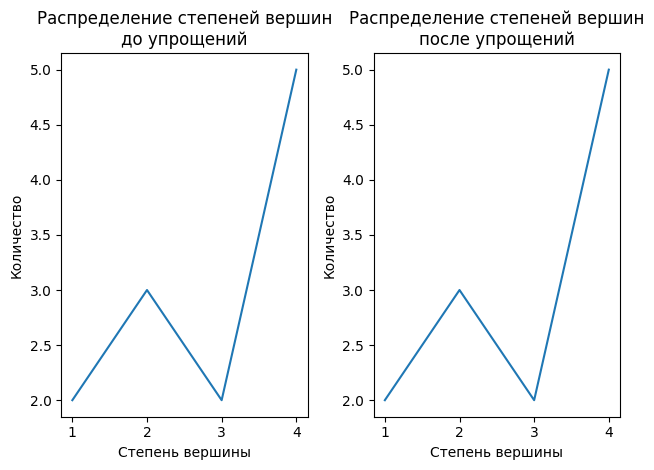

In [69]:
for k, z in enumerate(s):
    x = list(z.keys())
    x.sort()    
    y = [z[i] for i in x]
    name = 'после упрощений' if k else 'до упрощений'
    
    plt.subplot(1, 2, k+1)
    plt.plot(x, y)
    plt.title(f"Распределение степеней вершин\n{name}")
    plt.xlabel("Степень вершины")
    plt.ylabel("Количество")    
    
plt.tight_layout()
plt.show()

Без учета длинны лейблов ребер:


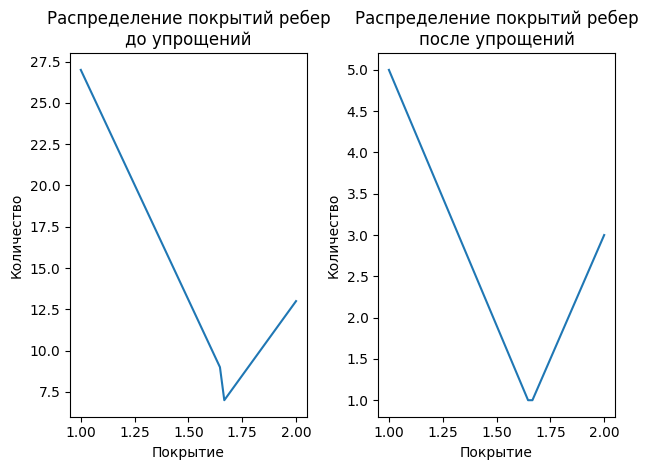

In [80]:
print("Без учета длинны лейблов ребер:")
for k, z in enumerate(s2):
    x = list(z.keys())
    x.sort()    
    y = [z[i] for i in x]
    name = 'после упрощений' if k else 'до упрощений'
    
    plt.subplot(1, 2, k+1)
    plt.plot(x, y)
    plt.title(f"Распределение покрытий ребер\n{name}")
    plt.xlabel("Покрытие")
    plt.ylabel("Количество")    
    
plt.tight_layout()
plt.show()

In [ ]:
print("С учетом длинны лейблов ребер:")
for k, z in enumerate(s2):
    x = list(z.keys())
    x.sort()    
    y = [z[i] for i in x]
    name = 'после упрощений' if k else 'до упрощений'
    
    plt.subplot(1, 2, k+1)
    plt.plot(x, y)
    plt.title(f"Распределение покрытий ребер\n{name}")
    plt.xlabel("Покрытие")
    plt.ylabel("Количество")    
    
plt.tight_layout()
plt.show()

In [ ]:
print("Изменение количества вершин и ребер:")
print()
print("До упрощений:")
print(f'Вершин {res[0][1]}, ребер {res[0][0]}')

print()
print("После упрощений:")
print(f'Вершин {res[1][1]}, ребер {res[1][0]}')